# distance to the closest star

## This code uses the standard photometric catalogue file to find the distance to the closest neighbouring star for each star in the catalogue and plot a histogram to determine the seeing of the standard catalogue

* make sure you add the path to directory correctly and the filename
* for any questions contact: tarun02kumar@gmail

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st
import matplotlib.ticker as tck
from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Rectangle
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker

In [3]:
path = "D:/VM_SHARED_UPDATED_29032021/VM_SHARED/shared_vmware/Paolo/ngc5904_13a/obj/calibrationtest/calibration"

In [4]:
def dist2closest_neighbour(filename, skip_header_row):
   file = os.path.join(path, filename)
   df = pd.read_csv(file, delimiter=None, delim_whitespace=True, skiprows=skip_header_row, header= None)
# Extract x and y positions from the DataFrame
   x_positions = df[1].values[:].astype(float)
   y_positions = df[2].values[:].astype(float)

# Calculate the distance between each star and its closest neighboring star
   closest_distances = []

   for i in range(len(x_positions)):
      distances = np.sqrt((x_positions - x_positions[i])**2 + (y_positions - y_positions[i])**2)
    # Exclude the distance to itself (which is 0) by setting it to a large value
      distances[i] = np.inf
      closest_distances.append(np.min(distances))
   return closest_distances
    

In [5]:
closest_distance1 = dist2closest_neighbour('NGC5904J_M30S_cf0_01.fnl', 3)
closest_distance2 = dist2closest_neighbour('NGC5904Ks_M30S_cf0_013.fnl', 3)

1.49437254673472


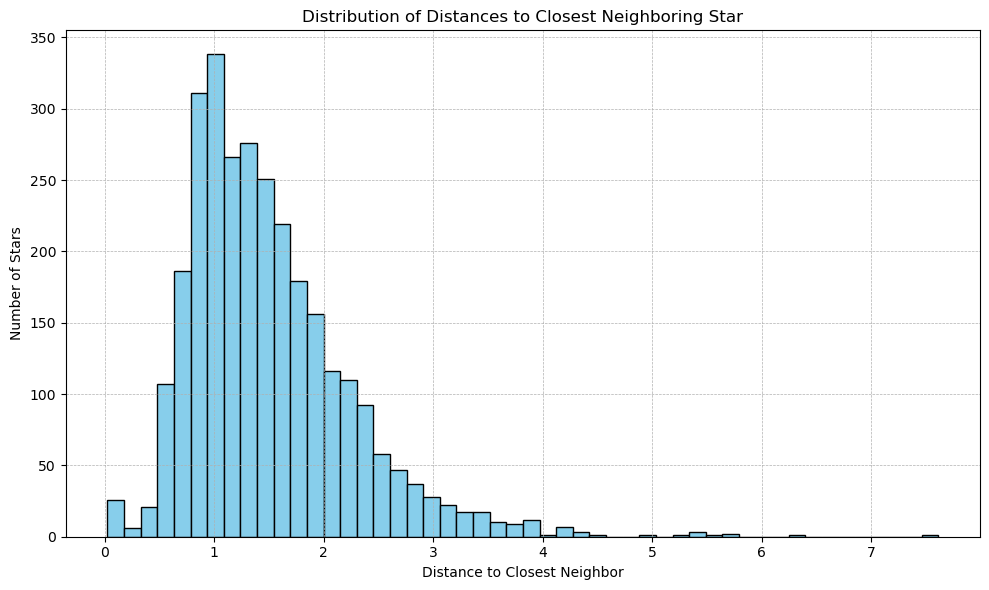

In [6]:
median_distance = np.mean(closest_distance2)
print(median_distance)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(closest_distance2, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Distance to Closest Neighbor')
plt.ylabel('Number of Stars')
plt.title('Distribution of Distances to Closest Neighboring Star')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

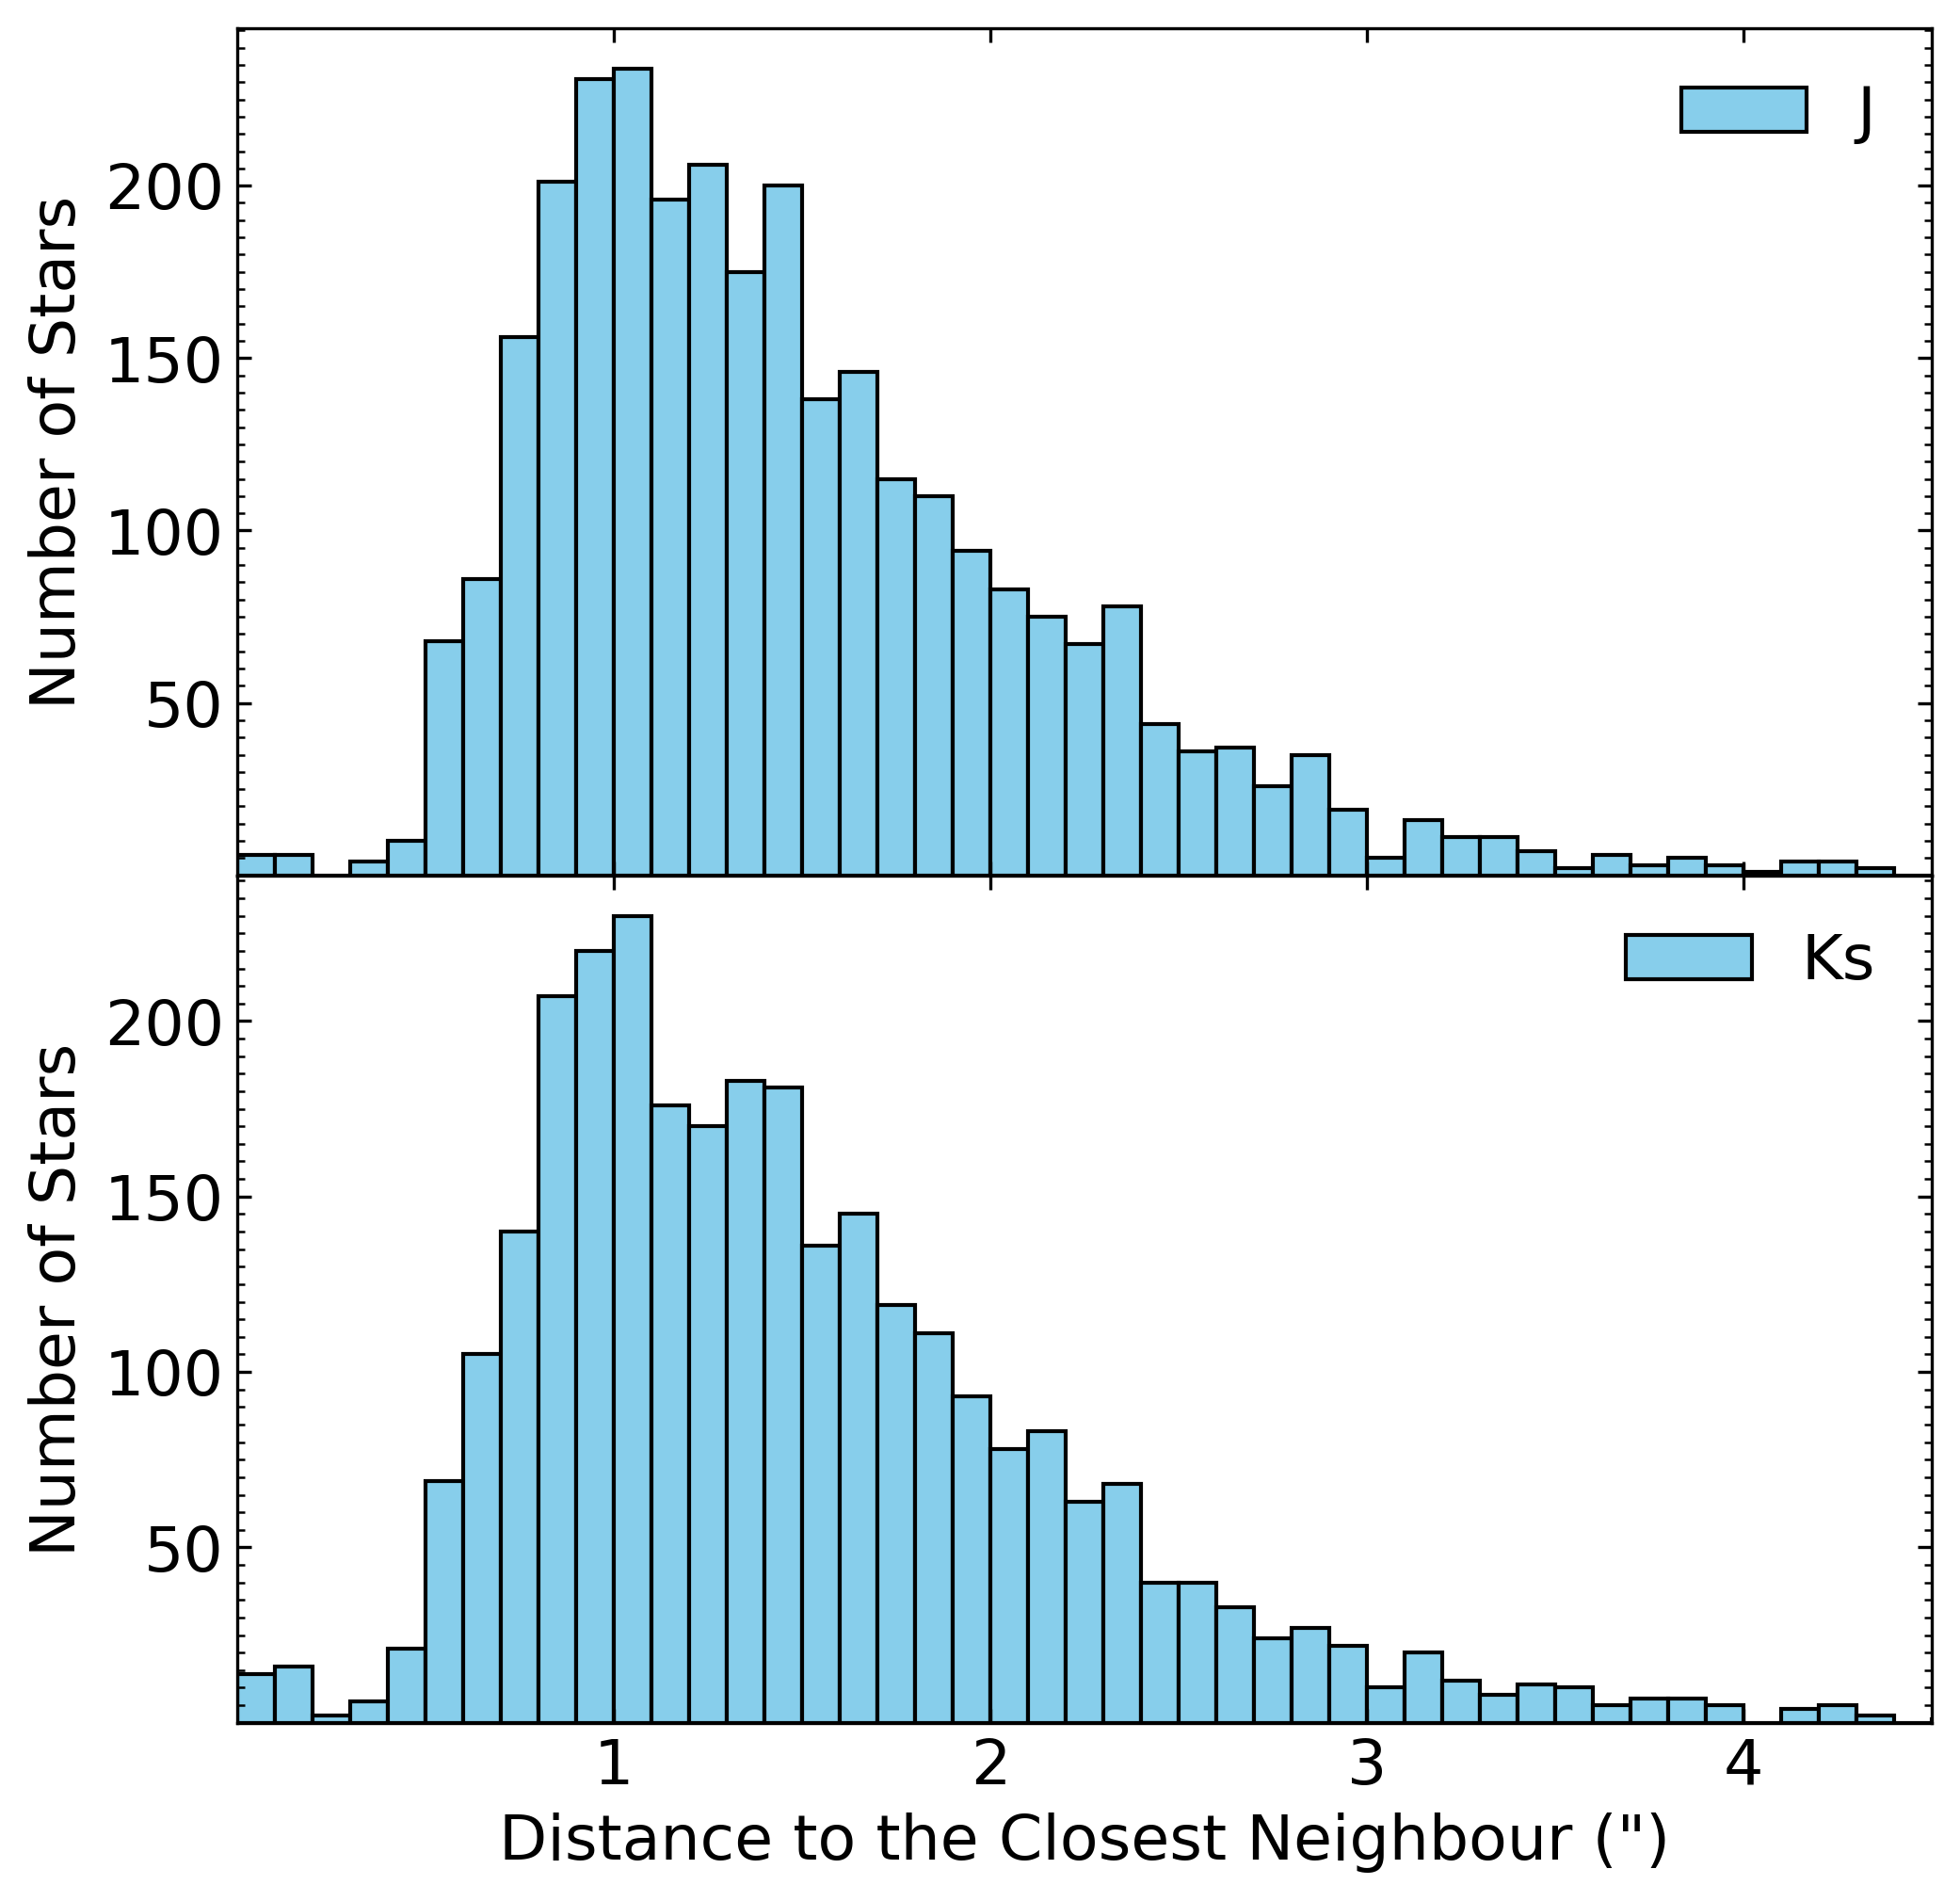

In [7]:
xtick_locs = [  1, 2, 3, 4]
xtick_labels = [ '1', '2', '3', '4']
ytick_locs = [50, 100, 150, 200]
ytick_labels = ['50', '100', '150', '200']

ytick_locs2 = [50, 100, 150, 200, 250]
ytick_labels2 = ['50', '100', '150', '200', '250']

bin_width = 0.1
bin_edges1 = np.arange(start=0.0, stop=max(closest_distance1) + bin_width, step=bin_width)
bin_edges2 = np.arange(start=0.0, stop=max(closest_distance2) + bin_width, step=bin_width)
# plt.hist(closest_distances, bins=bin_edges)

fig, axs = plt.subplots(2,1, figsize=(6,6), sharex=True,sharey=False, dpi= 300,gridspec_kw={'hspace': 0,'wspace': 0 })
# fig=plt.figure(figsize=(6,8), dpi= 500, facecolor='w', edgecolor='k')

ax1 = axs[0]
ax2 = axs[1]

ax1.hist(closest_distance1, bins=bin_edges1, color='skyblue', edgecolor='black', label = 'J')
# ax1.axvline (x=1, color = 'red', linestyle = '--')
# ax1.plot(J2M-K2M, K2M, "go", ms=0.5, label= '2MASS' )
ax1.legend(loc="upper right", fontsize= 16, frameon=False, markerscale=1)


ax1.set_xticks(xtick_locs, xtick_labels, fontsize= 16)
ax1.set_yticks(ytick_locs, ytick_labels, fontsize= 16)
ax1.tick_params(axis='x', bottom=True, top=True, direction='in', which ='both', labelsize=16)  
ax1.tick_params(axis='y', left=True, right=True,  direction='in', which ='both', labelsize=16)  

# ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator(10))
# ax1.set_ylim(21,12)
ax1.set_xlim(0.0,4.5)
ax1.set_xlabel('J-Ks', fontsize= 16)
ax1.set_ylabel('Number of Stars', fontsize= 16)






ax2.hist(closest_distance2, bins=bin_edges2, color='skyblue', edgecolor='black', label = 'Ks')
# ax2.axvline (x=1, color = 'red', linestyle = '--')
ax2.legend(loc="upper right", fontsize= 16, frameon=False,  markerscale=1)


ax2.set_xticks(xtick_locs, xtick_labels, fontsize= 16)
ax2.set_yticks(ytick_locs, ytick_labels, fontsize= 16)
ax2.tick_params(axis='x', bottom=True, top=True, direction='in', which ='both', labelsize=16)  
ax2.tick_params(axis='y', left=True, right=True,  direction='in', which ='both', labelsize=16)  

# ax2.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
ax2.yaxis.set_minor_locator(ticker.AutoMinorLocator(10))
# ax2.set_ylim(17,9)
ax2.set_xlim(0.0,4.5)
ax2.set_xlabel('Distance to the Closest Neighbour (")', fontsize= 16)
ax2.set_ylabel('Number of Stars', fontsize= 16)


ax1.set_position([0.0, 0.5, 1.0, 0.50])  # [left, bottom, width, height]
ax2.set_position([0.0, 0.0, 1.0, 0.50]) 
# fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
# plt.savefig("2Mass_table_irsa_catalog_search_results1000_NGC5904_GeMS_Peter.png", dpi=300)
plt.show()


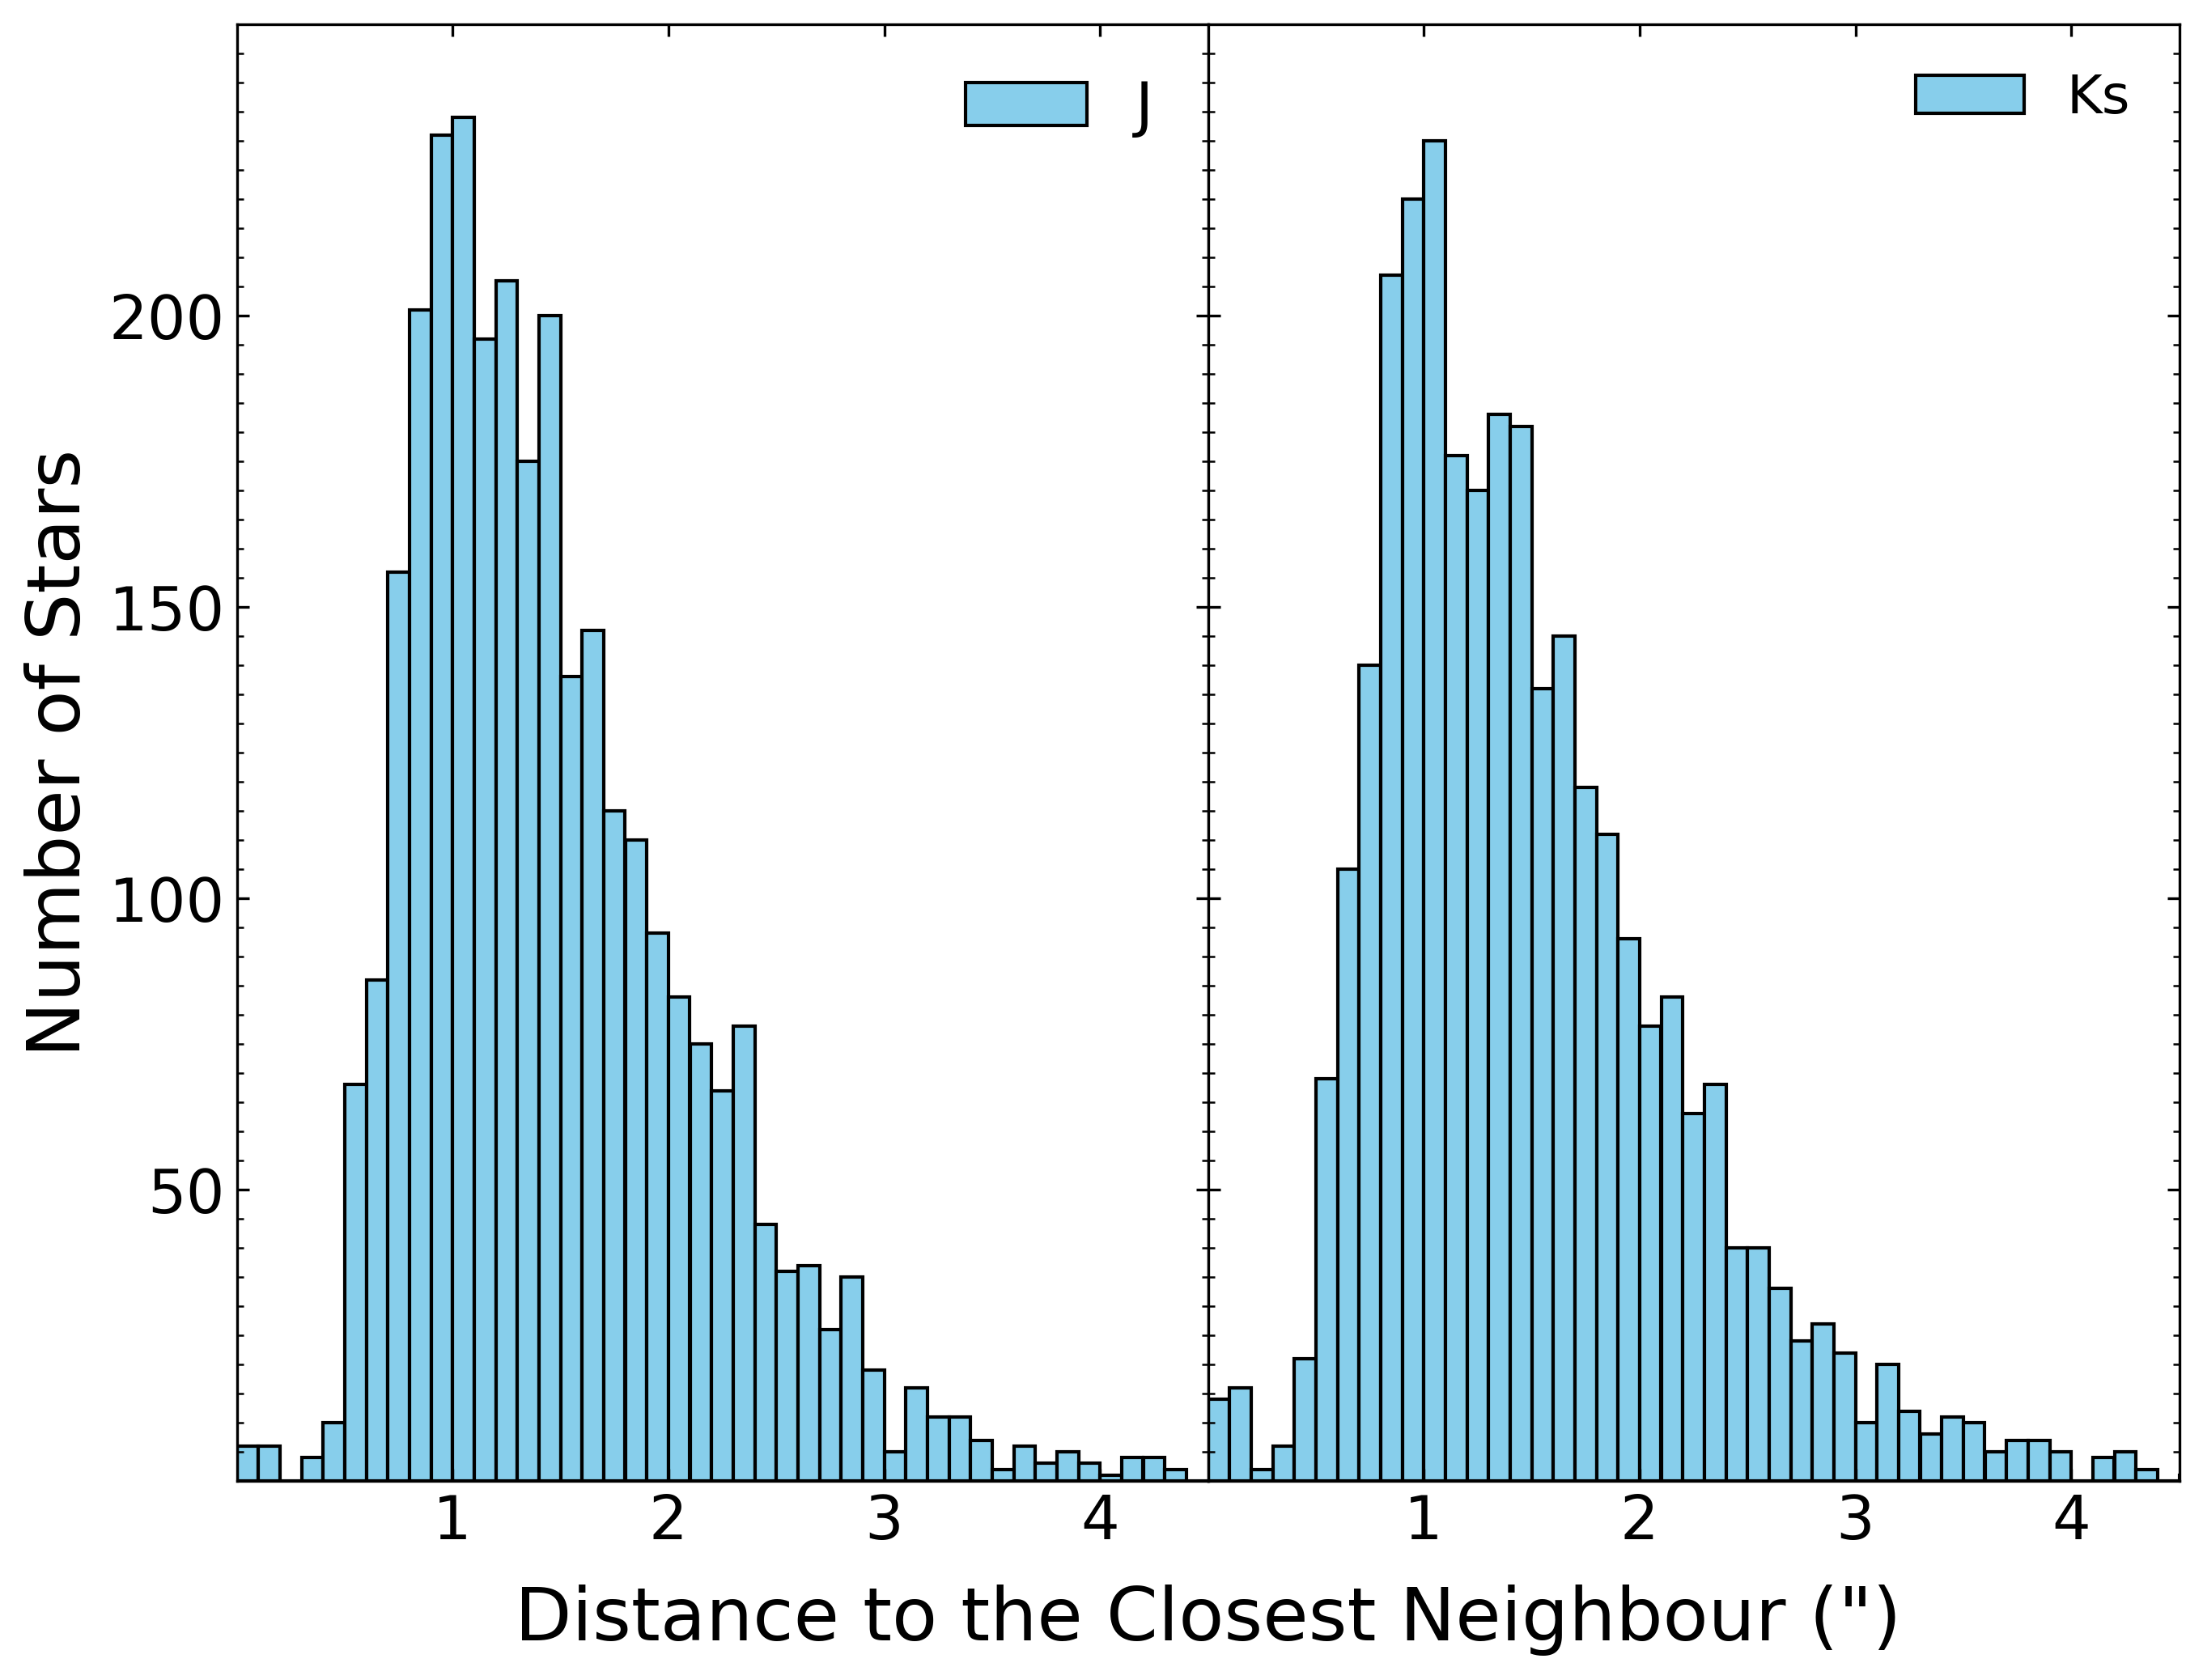

In [17]:
xtick_locs = [  1, 2, 3, 4]
xtick_labels = [ '1', '2', '3', '4']
ytick_locs = [50, 100, 150, 200]
ytick_labels = ['50', '100', '150', '200']

ytick_locs2 = [50, 100, 150, 200, 250]
ytick_labels2 = ['50', '100', '150', '200', '250']

bin_width = 0.1
bin_edges1 = np.arange(start=0.0, stop=max(closest_distance1) + bin_width, step=bin_width)
bin_edges2 = np.arange(start=0.0, stop=max(closest_distance2) + bin_width, step=bin_width)
# plt.hist(closest_distances, bins=bin_edges)

fig, axs = plt.subplots(1,2, figsize=(8,6), sharex=True,sharey=True, dpi= 300,gridspec_kw={'hspace': 0,'wspace': 0 })
# fig=plt.figure(figsize=(6,8), dpi= 500, facecolor='w', edgecolor='k')

ax1 = axs[0]
ax2 = axs[1]

ax1.hist(closest_distance1, bins=bin_edges1, color='skyblue', edgecolor='black', label = 'J')
# ax1.axvline (x=1, color = 'red', linestyle = '--')
# ax1.plot(J2M-K2M, K2M, "go", ms=0.5, label= '2MASS' )
ax1.legend(loc="upper right", fontsize= 18, frameon=False, markerscale=1)


ax1.set_xticks(xtick_locs, xtick_labels, fontsize= 18)
ax1.set_yticks(ytick_locs, ytick_labels, fontsize= 18)
ax1.tick_params(axis='x', bottom=True, top=True, direction='in', which ='both', labelsize=18)  
ax1.tick_params(axis='y', left=True, right=True,  direction='in', which ='both', labelsize=18)  

# ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator(10))
ax1.set_ylim(0,250)
ax1.set_xlim(0.0,4.5)

ax1.set_ylabel('Number of Stars', fontsize= 22)






ax2.hist(closest_distance2, bins=bin_edges2, color='skyblue', edgecolor='black', label = 'Ks')
# ax2.axvline (x=1, color = 'red', linestyle = '--')
ax2.legend(loc="upper right", fontsize= 16, frameon=False,  markerscale=1)


ax2.set_xticks(xtick_locs, xtick_labels, fontsize= 20)
# ax2.set_yticks(ytick_locs, ytick_labels, fontsize= 16)
ax2.tick_params(axis='x', bottom=True, top=True, direction='in', which ='both', labelsize=18)  
ax2.tick_params(axis='y', left=True, right=True,  direction='in', which ='both', labelsize=18)  

# ax2.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
ax2.yaxis.set_minor_locator(ticker.AutoMinorLocator(10))
ax2.set_ylim(0,250)
ax2.set_xlim(0.0,4.5)
# ax2.set_xlabel('Distance to the Closest Neighbour (")', fontsize= 16)
# ax2.set_ylabel('Number of Stars', fontsize= 16)


ax1.set_position([0.0, 0.0, 0.5, 1])  # [left, bottom, width, height]
ax2.set_position([0.5, 0.0, 0.5, 1]) 
fig.text(0.5, -0.12, 'Distance to the Closest Neighbour (")', ha="center", va="bottom", fontsize=22)
# fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
# plt.savefig("2Mass_table_irsa_catalog_search_results1000_NGC5904_GeMS_Peter.png", dpi=300)
plt.show()
